In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [ ]:
#Ввод начальных данных
a = 0
b = 6
h = 0.05
n = 180
m = lambda t: 1 - 0.2 * t
K = lambda tau: 3 * np.exp(-2 * abs(tau)) * (1 + 2 * abs(tau))
# Тестовые данные
#t_a = 0
#t_b = 10
#t_h = 0.1
#t_n = 100
#t_m = lambda t: 1 - np.exp(-t)
#t_K = lambda tau: 2 * np.exp(-abs(tau))

In [ ]:
#Разложение Холецкого
def MyCholesky(A):
    n = len(A)
    L = np.zeros((n, n))

    for i in range(n):
        for j in range(i+1):
            s = sum(L[i][k] * L[j][k] for k in range(j))
            if (i == j):
                L[i][j] = np.sqrt(A[i][i] - s)
            else:
                L[i][j] = (1.0 / L[j][j] * (A[i][j] - s))
    return L

In [ ]:
A = np.array([[4, 12, -16], 
              [12, 37, -43], 
              [-16, -43, 98]])
L = MyCholesky(A)
print(L)

[[ 2.  0.  0.]
 [ 6.  1.  0.]
 [-8.  5.  3.]]


In [ ]:
print(np.linalg.cholesky(A))

[[ 2.  0.  0.]
 [ 6.  1.  0.]
 [-8.  5.  3.]]


In [ ]:
# Моделирование Гауссовского процесса
def modeling_comments(a, b, h, m, K):
  # Находим размерность k случайного вектора
  k = np.modf((b - a) / h)[1]
  k = int(k)
  # Вычисляем вектор математических ожиданий
  expected = [m(i * h) for i in range(k + 1)]
  print("Вектор математических ожиданий (срез):")
  print([round(expected[i], 4) for i in range(10)])
  # Вычисляем матрицу ковариаций
  Sigma = []
  print()
  print("Матрица ковариаций (срез):")
  for i in range(k + 1):
    tmp = []
    for j in range(k + 1):
      tmp.append(K(abs(i - j) * h))
    Sigma.append(tmp)
  for i in range(10):
    print([round(Sigma[i][j], 4) for j in range(10)])
  # Применяем разложение Холецкого к ковариационной матрице Сигма
  Sigma = np.array(Sigma)
  L = MyCholesky(Sigma)
  print()
  print("Матрица L (результат разложения Холецкого):")
  for i in range(10):
    print([round(L[i][j], 4) for j in range(10)])
  # Ищем L транспонированную
  L_t = L.T
  # Считае невязку полученного разложения
  LL = L.dot(L_t)
  residual = np.abs(LL - Sigma)
  max_residual = np.max(residual)
  print()
  print("Невязка полученного разложения: ", max_residual)
  # Генерируем последовательность независимых стандартных Гауссовских величин
  eps = np.random.normal(size = k + 1)
  print()
  print("Последовательность из k+1 независимой стандартной гауссовской величины (срез):")
  print([round(eps[i], 4) for i in range(10)])
  # Центрируем последовательность
  etta = L @ eps
  # Завершаем моделирование траектории гауссовского процесса
  # добавляя нужное математическое ожидание
  ksi = [etta[i] + expected[i] for i in range(k + 1)]
  return Sigma, expected

def modeling(a, b, h, m, K):
  # Находим размерность k случайного вектора
  k = np.modf((b - a) / h)[1]
  k = int(k)
  # Вычисляем вектор математических ожиданий
  expected = [m(i * h) for i in range(k + 1)]
  # Вычисляем матрицу ковариаций
  Sigma = []
  for i in range(k + 1):
    tmp = []
    for j in range(k + 1):
      tmp.append(K(abs(i - j) * h))
    Sigma.append(tmp)
  # Применяем разложение Холецкого к ковариационной матрице Сигма
  Sigma = np.array(Sigma)
  L = MyCholesky(Sigma)
  # Ищем L транспонированную
  L_t = L.T
  # Считае невязку полученного разложения
  LL = L.dot(L_t)
  residual = np.abs(LL - Sigma)
  max_residual = np.max(residual)
  # Генерируем последовательность независимых стандартных Гауссовских величин
  eps = np.random.normal(size = k + 1)
  # Центрируем последовательность
  etta = L @ eps
  # Завершаем моделирование траектории гауссовского процесса
  # добавляя нужное математическое ожидание
  ksi = []
  for i in range(k + 1):
    ksi.append(etta[i] + expected[i])
  return ksi


Sigma = modeling_comments(a, b, h, m, K)[0]
expected = modeling_comments(a, b, h, m, K)[1]

Вектор математических ожиданий (срез):
[1.0, 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91]

Матрица ковариаций (срез):
[3.0, 2.986, 2.9474, 2.8892, 2.8153, 2.7294, 2.6343, 2.5326, 2.4264, 2.3174]
[2.986, 3.0, 2.986, 2.9474, 2.8892, 2.8153, 2.7294, 2.6343, 2.5326, 2.4264]
[2.9474, 2.986, 3.0, 2.986, 2.9474, 2.8892, 2.8153, 2.7294, 2.6343, 2.5326]
[2.8892, 2.9474, 2.986, 3.0, 2.986, 2.9474, 2.8892, 2.8153, 2.7294, 2.6343]
[2.8153, 2.8892, 2.9474, 2.986, 3.0, 2.986, 2.9474, 2.8892, 2.8153, 2.7294]
[2.7294, 2.8153, 2.8892, 2.9474, 2.986, 3.0, 2.986, 2.9474, 2.8892, 2.8153]
[2.6343, 2.7294, 2.8153, 2.8892, 2.9474, 2.986, 3.0, 2.986, 2.9474, 2.8892]
[2.5326, 2.6343, 2.7294, 2.8153, 2.8892, 2.9474, 2.986, 3.0, 2.986, 2.9474]
[2.4264, 2.5326, 2.6343, 2.7294, 2.8153, 2.8892, 2.9474, 2.986, 3.0, 2.986]
[2.3174, 2.4264, 2.5326, 2.6343, 2.7294, 2.8153, 2.8892, 2.9474, 2.986, 3.0]

Матрица L (результат разложения Холецкого):
[1.7321, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.7239, 0.1

In [ ]:
# Смоделируем n траекторий
def tracks_modeling(a, b, h, m, K, n):
  tracks = []
  for i in range(n):
    tracks.append(modeling(a, b, h, m, K))
  return tracks
tracks = tracks_modeling(a, b, h, m, K, n)

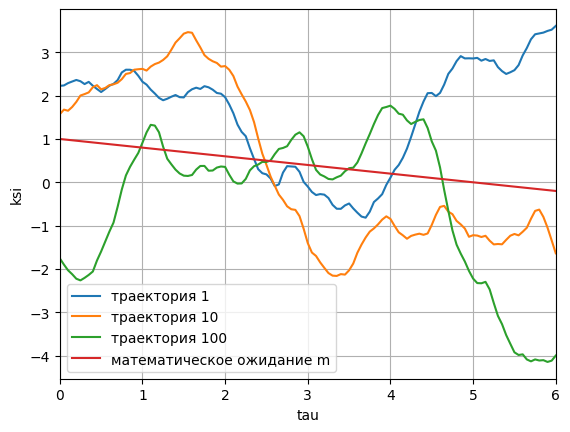

In [ ]:
# Визуализация трёх любых траекторий
def krasota(a, b, h, m, one = 1, two = 10, tree = 100):
  x = np.arange(a, b+h, h)
  y1 = tracks[one - 1]
  plt.plot(x, y1, label = f"траектория {one}")
  y2 = tracks[two - 1]
  plt.plot(x, y2, label = f"траектория {two}")
  y3 = tracks[tree - 1]
  plt.plot(x, y3, label = f"траектория {tree}")
  plt.plot(x, m(x), label = f"математическое ожидание m")
  plt.grid(which = "major")
  plt.legend()
  plt.xlabel("tau")
  plt.ylabel("ksi")
  plt.xlim([a, b])
  plt.show()
krasota(a, b, h, m)

In [ ]:
# Проверим качество моделирования траекторий
tracks = np.array(tracks)
tracks_t = tracks.T # Для работы с сечениями

def scatter_par(a, b, h, m, K, main = 2, sub = 1, color = "crimson"):
  plt.scatter(x = tracks_t[sub - 1], y = tracks_t[main - 1], color = color)
  plt.xlabel(f"Сечение {main}")
  plt.ylabel(f"Сечение {sub}")
  plt.axhline(0, color='black', linewidth=2)
  plt.axvline(0, color='black', linewidth=2)
  plt.grid()
  plt.show()

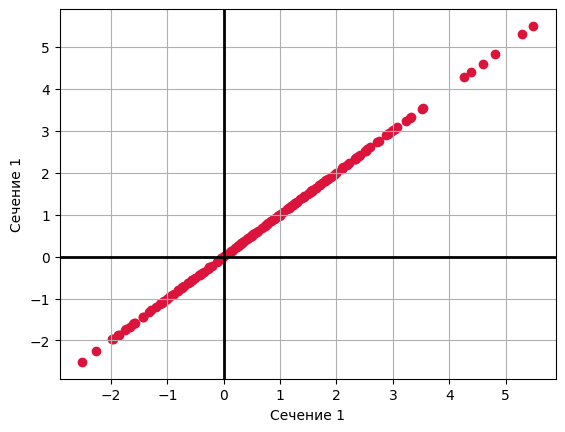

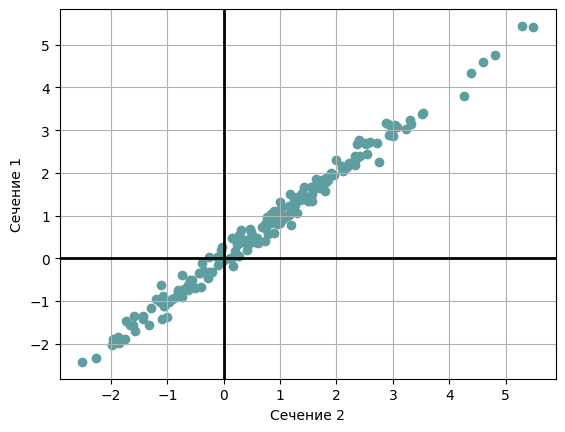

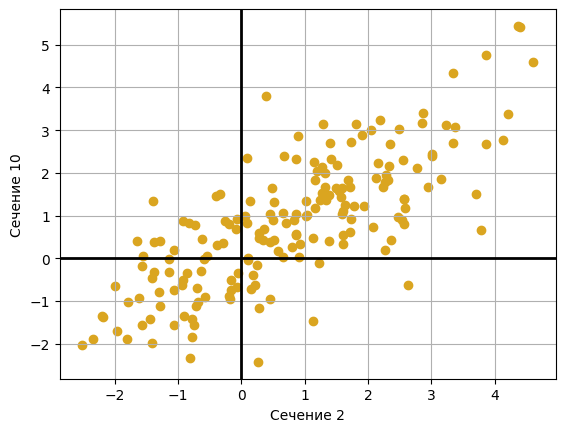

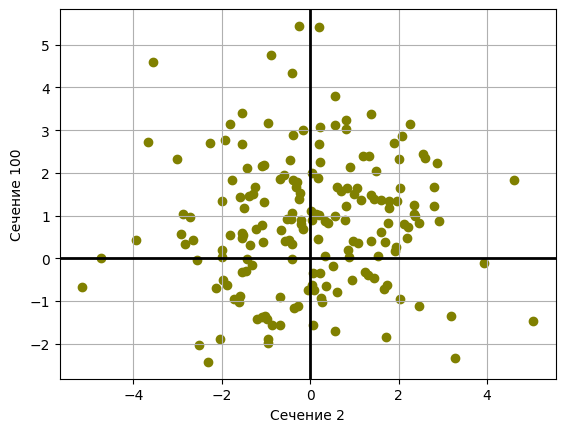

In [ ]:
scatter_par(a, b, h, m, K, 1, 1, "crimson")
scatter_par(a, b, h, m, K, 2, 1, "cadetblue")
scatter_par(a, b, h, m, K, 2, 10, "goldenrod")
scatter_par(a, b, h, m, K, 2, 100, "olive")

In [ ]:
# Коэффициенты корреляции
def teor_cor(a, b, h, K, main, sub):
  main -= 1
  sub -= 1
  r = Sigma[main][sub] / np.sqrt(Sigma[main][main] * Sigma[sub][sub])
  return r

def emper_cor(n, main, sub):
  chisl = 0
  sum_1 = 0
  sum_2 = 0
  main -= 1
  sub -= 1
  for i in range(n):
    chisl += ((tracks_t[main][i] - np.mean(tracks_t[main])) * 
              (tracks_t[sub][i] - np.mean(tracks_t[sub])))
    sum_1 += (tracks_t[main][i] - np.mean(tracks_t[main])) ** 2
    sum_2 += (tracks_t[sub][i] - np.mean(tracks_t[sub])) ** 2
  znam = np.sqrt(sum_1 * sum_2)
  r = chisl / znam
  return r


result = []
slices = [1, 10, 100]
for i in range(3):
  result.append([round(teor_cor(a, b, h, K, 2, slices[i]), 4),
                 round(emper_cor(n, 2, slices[i]), 4)])
teor = [result[i][0] for i in range(3)]
emper = [result[i][1] for i in range(3)]
print(f"Теоретические: {teor}")
print(f"Эмперические: {[result[i][1] for i in range(3)]}")

Теоретические: [0.9953, 0.8088, 0.0006]
Эмперические: [0.994, 0.7673, 0.0383]


In [ ]:
# Доверительные интервалы
def intervals(n):
  confidence = 0.95
  quantile = norm.ppf((1 + confidence) / 2)
  rho = []
  dist = norm()
  for i in range(3):
    rho_i_m = np.tanh(np.log((1 + emper[i]) / (1 - emper[i])) / 2 -
                        emper[i] / (2 * (n - 1)) - 
                        quantile / np.sqrt(n - 2))
    rho_i_p = np.tanh(np.log((1 + emper[i]) / (1 - emper[i])) / 2 -
                        emper[i] / (2 * (n - 1)) + 
                        quantile / np.sqrt(n - 2))
    print(f"rho(-): {rho_i_m}; r: {teor[i]}; rho(+): {rho_i_p}")

In [ ]:
intervals(n)

rho(-): 0.9919144613788342; r: 0.9953; rho(+): 0.9954992092820981
rho(-): 0.6986612190294088; r: 0.8088; rho(+): 0.8205475960168301
rho(-): -0.10826771622585071; r: 0.0006; rho(+): 0.18303130275365578


In [ ]:
# Проверка элементов сечений на принадлежность нормальному закону распределения
def histograma(N, color, m):
  N -= 1
  mi = min(tracks_t[N])
  ma = max(tracks_t[N])

  # Размах выборки
  omega = ma - mi

  # Группировка данных
  l = np.trunc(1 + 3.32*np.log10(len(tracks_t[N])))
  l = int(l)

  h = omega / l

  borders = []
  for i in range(l):
    borders.append(round((mi + i * h), 3) )

  hist = np.histogram(tracks_t[N], l)

  r_f = [0] * l
  for i in range (0, l):
    r_f[i] = hist[0][i] / len(tracks_t[N])

  hight = []
  for i in range(l):
    hight.append(round((r_f[i] / h), 3))

  # Гистограммы относительных частот
  cords = np.arange (-100, 100, 0.001)
  plt.hist(tracks_t[N], 
         bins = np.arange(mi, ma + 1, h),
         density = True, 
         range = (mi, ma),
         color = color)
  plt.plot (cords, 
            scipy.stats.norm.pdf (cords, expected[N], np.sqrt(Sigma[N][N])), 
            color = "crimson")
  plt.xlim(mi, ma)
  plt.show()

  # Выборочные характеристики
  m = np.mean(tracks_t[N])

  s = np.var(tracks_t[N])

  print(f"Выборочное среднее: {round(m, 4)}, Выборочное S: {round(s, 4)}")
  print(f"Теоретическое мат. ожидание: {round(expected[N], 4)}," 
  f"Теоретическое с.к.о.: {round(np.sqrt(Sigma[N][N]), 4)}")


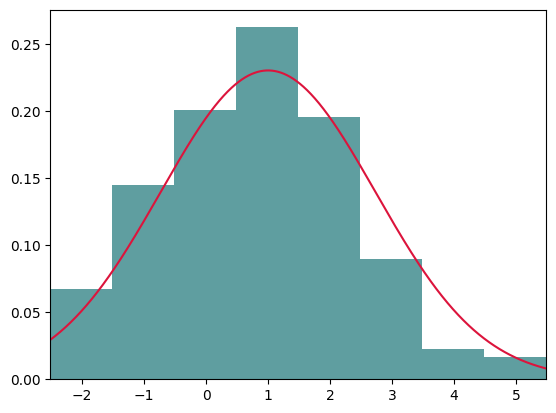

Выборочное среднее: 0.8356, Выборочное S: 2.3587
Теоретическое мат. ожидание: 1.0,Теоретическое с.к.о.: 1.7321


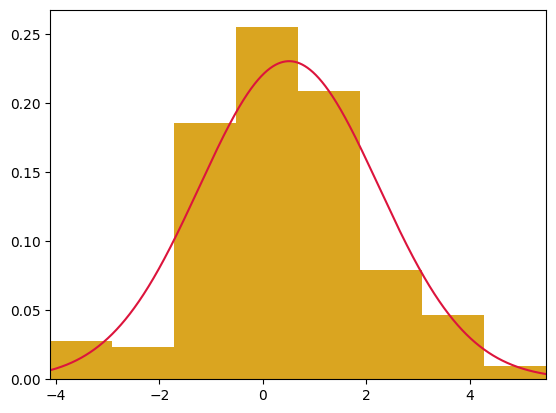

Выборочное среднее: 0.4306, Выборочное S: 2.6917
Теоретическое мат. ожидание: 0.51,Теоретическое с.к.о.: 1.7321


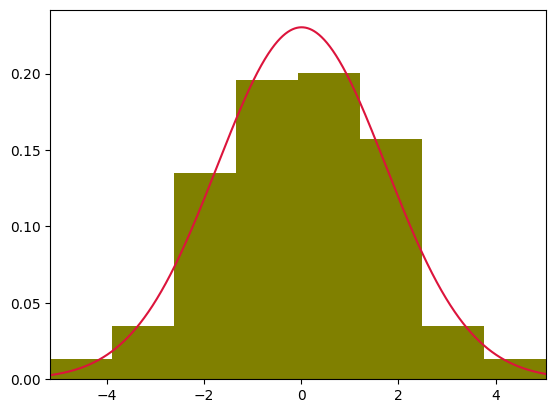

Выборочное среднее: 0.0092, Выборочное S: 2.9874
Теоретическое мат. ожидание: 0.01,Теоретическое с.к.о.: 1.7321


In [ ]:
histograma(1, "cadetblue", m)
histograma(50, "goldenrod", m)
histograma(100, "olive", m)

In [ ]:
# Поверхности выборочных коэффициентов корреляции
# не надо это списывать :)

nn = len(tracks[0])
def cor_3d(a, b, h, K, n, nn):
  cor_3d_emper = []
  cor_3d_teor = []
  for i in range(nn):
    tmp_1 = []
    tmp_2 = []
    for j in range(nn):
      tmp_1.append(emper_cor(n, i + 1, j + 1))
      tmp_2.append(teor_cor(a, b, h, K, i + 1, j + 1))
    cor_3d_emper.append(tmp_1)
    cor_3d_teor.append(tmp_2)
  confidence = 0.95
  quantile = norm.ppf((1 + confidence) / 2)
  rho_m = []
  rho_p = []
  dist = norm()
  for i in range(nn):
    tmp_1 = []
    tmp_2 = []
    for j in range(nn):
      rho_i_m = np.tanh(np.log((1 + cor_3d_emper[i][j]) /
                               (1 - cor_3d_emper[i][j])) /
                         2 - cor_3d_emper[i][j] / (2 * (n - 1)) -
                         quantile / np.sqrt(n - 2))
      rho_i_p = np.tanh(np.log((1 + cor_3d_emper[i][j]) /
                               (1 - cor_3d_emper[i][j])) /
                         2 - cor_3d_emper[i][j] / (2 * (n - 1)) +
                         quantile / np.sqrt(n - 2))
      tmp_1.append(rho_i_m)
      tmp_2.append(rho_i_p)
    rho_m.append(tmp_1)
    rho_p.append(tmp_2)
  return cor_3d_emper, cor_3d_teor, rho_m, rho_p

emper_3d = cor_3d(a, b, h, K, n, nn)[0]
teor_3d = cor_3d(a, b, h, K, n, nn)[1]
rho_m_3d = cor_3d(a, b, h, K, n, nn)[2]
rho_p_3d = cor_3d(a, b, h, K, n, nn)[3]

<ipython-input-41-44ce41d4ff04>:23: RuntimeWarning: divide by zero encountered in double_scalars
  rho_i_m = np.tanh(np.log((1 + cor_3d_emper[i][j]) /
<ipython-input-41-44ce41d4ff04>:27: RuntimeWarning: divide by zero encountered in double_scalars
  rho_i_p = np.tanh(np.log((1 + cor_3d_emper[i][j]) /


<ipython-input-42-afb1a0048757>:17: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 10


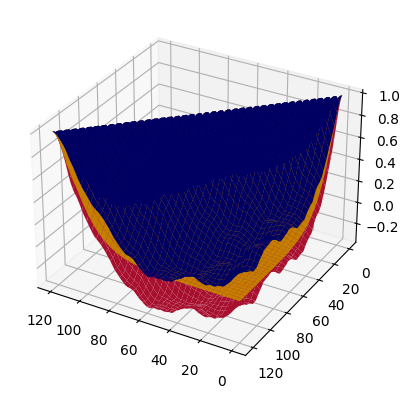

In [ ]:
# и вот это не надо это списывать :)

teor_3d = np.array(teor_3d)
rho_m_3d = np.array(rho_m_3d)
rho_p_3d = np.array(rho_p_3d)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1, y1 = np.meshgrid(np.arange(teor_3d.shape[0]), np.arange(teor_3d.shape[1]))
x2, y2 = np.meshgrid(np.arange(rho_m_3d.shape[0]), np.arange(rho_m_3d.shape[1]))
x3, y3 = np.meshgrid(np.arange(rho_p_3d.shape[0]), np.arange(rho_p_3d.shape[1]))

ax.plot_surface(x1, y1, teor_3d, color = "orange")
ax.plot_surface(x2, y2, rho_m_3d, color = "crimson")
ax.plot_surface(x3, y3, rho_p_3d, color = "navy")

ax.view_init(elev=30, azim=120)
ax.dist = 10

plt.show()

<Axes: >

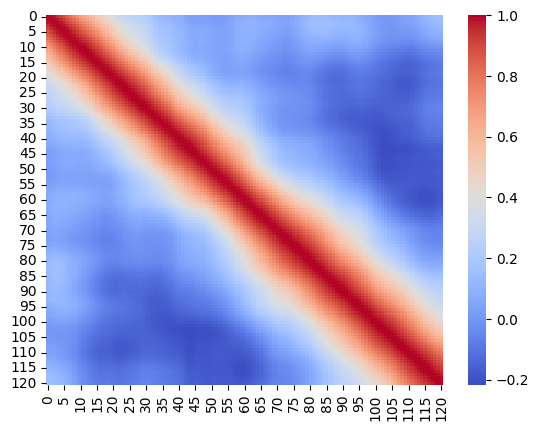

In [ ]:
# Корреллограмма

# и это не надо списывать :)

sns.heatmap(emper_3d, annot=False, cmap='coolwarm')